# CREDIT WISE LOAN APPROVAL SYSTEM

In [26]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
# Loading Data

df = pd.read_csv("loan_approval_data.csv")

# print(df.head(10))
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

# Handling Missing Data

In [28]:
# separating columns of different datatypes values
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns
#print(f"Categorical Columns: \n\n{categorical_cols}\n\n\nNumerical Columns: \n\n{numerical_cols}")

# importing SimpleImputer 
from sklearn.impute import SimpleImputer

# Defining Stratgy to numeric columns
num_imp = SimpleImputer(strategy="mean")
# Filling Missing Values of Numeric columns using num_imp Strategy
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])



# Defining Stratgy to categorical columns
cat_imp = SimpleImputer(strategy="most_frequent")
# Filling Missing Values of Numeric columns using num_imp Strategy
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])


# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Is Loan approved or not?')

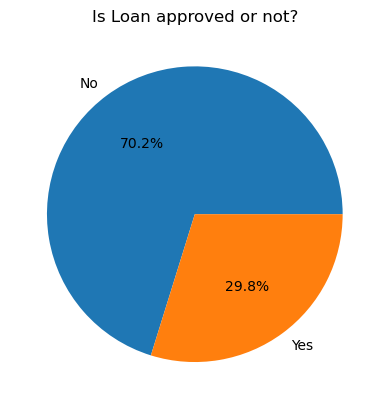

In [29]:
# Checking How Balanced Our Classes Are?

classes_count = df["Loan_Approved"].value_counts()

plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Is Loan approved or not?")

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Male'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Graduate'),
  Text(3, 0, 'Not Graduate'),
  Text(4, 0, 'Salaried'),
  Text(5, 0, 'Contract'),
  Text(6, 0, 'Self-employed'),
  Text(7, 0, 'Unemployed')])

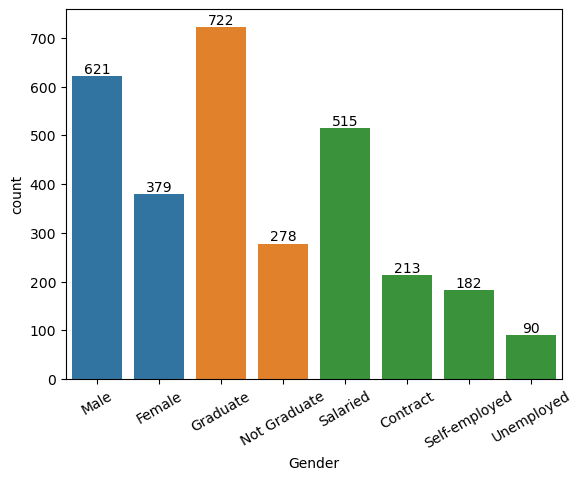

In [30]:
# Analysing Catgories:

gender_count = df["Gender"].value_counts()

ax = sns.barplot(gender_count)
ax.bar_label(ax.containers[0])



edu_count = df["Education_Level"].value_counts()

ax = sns.barplot(edu_count)
ax.bar_label(ax.containers[1])



emp_count = df["Employment_Status"].value_counts()

ax = sns.barplot(emp_count)
ax.bar_label(ax.containers[2])
plt.xticks(rotation=30)

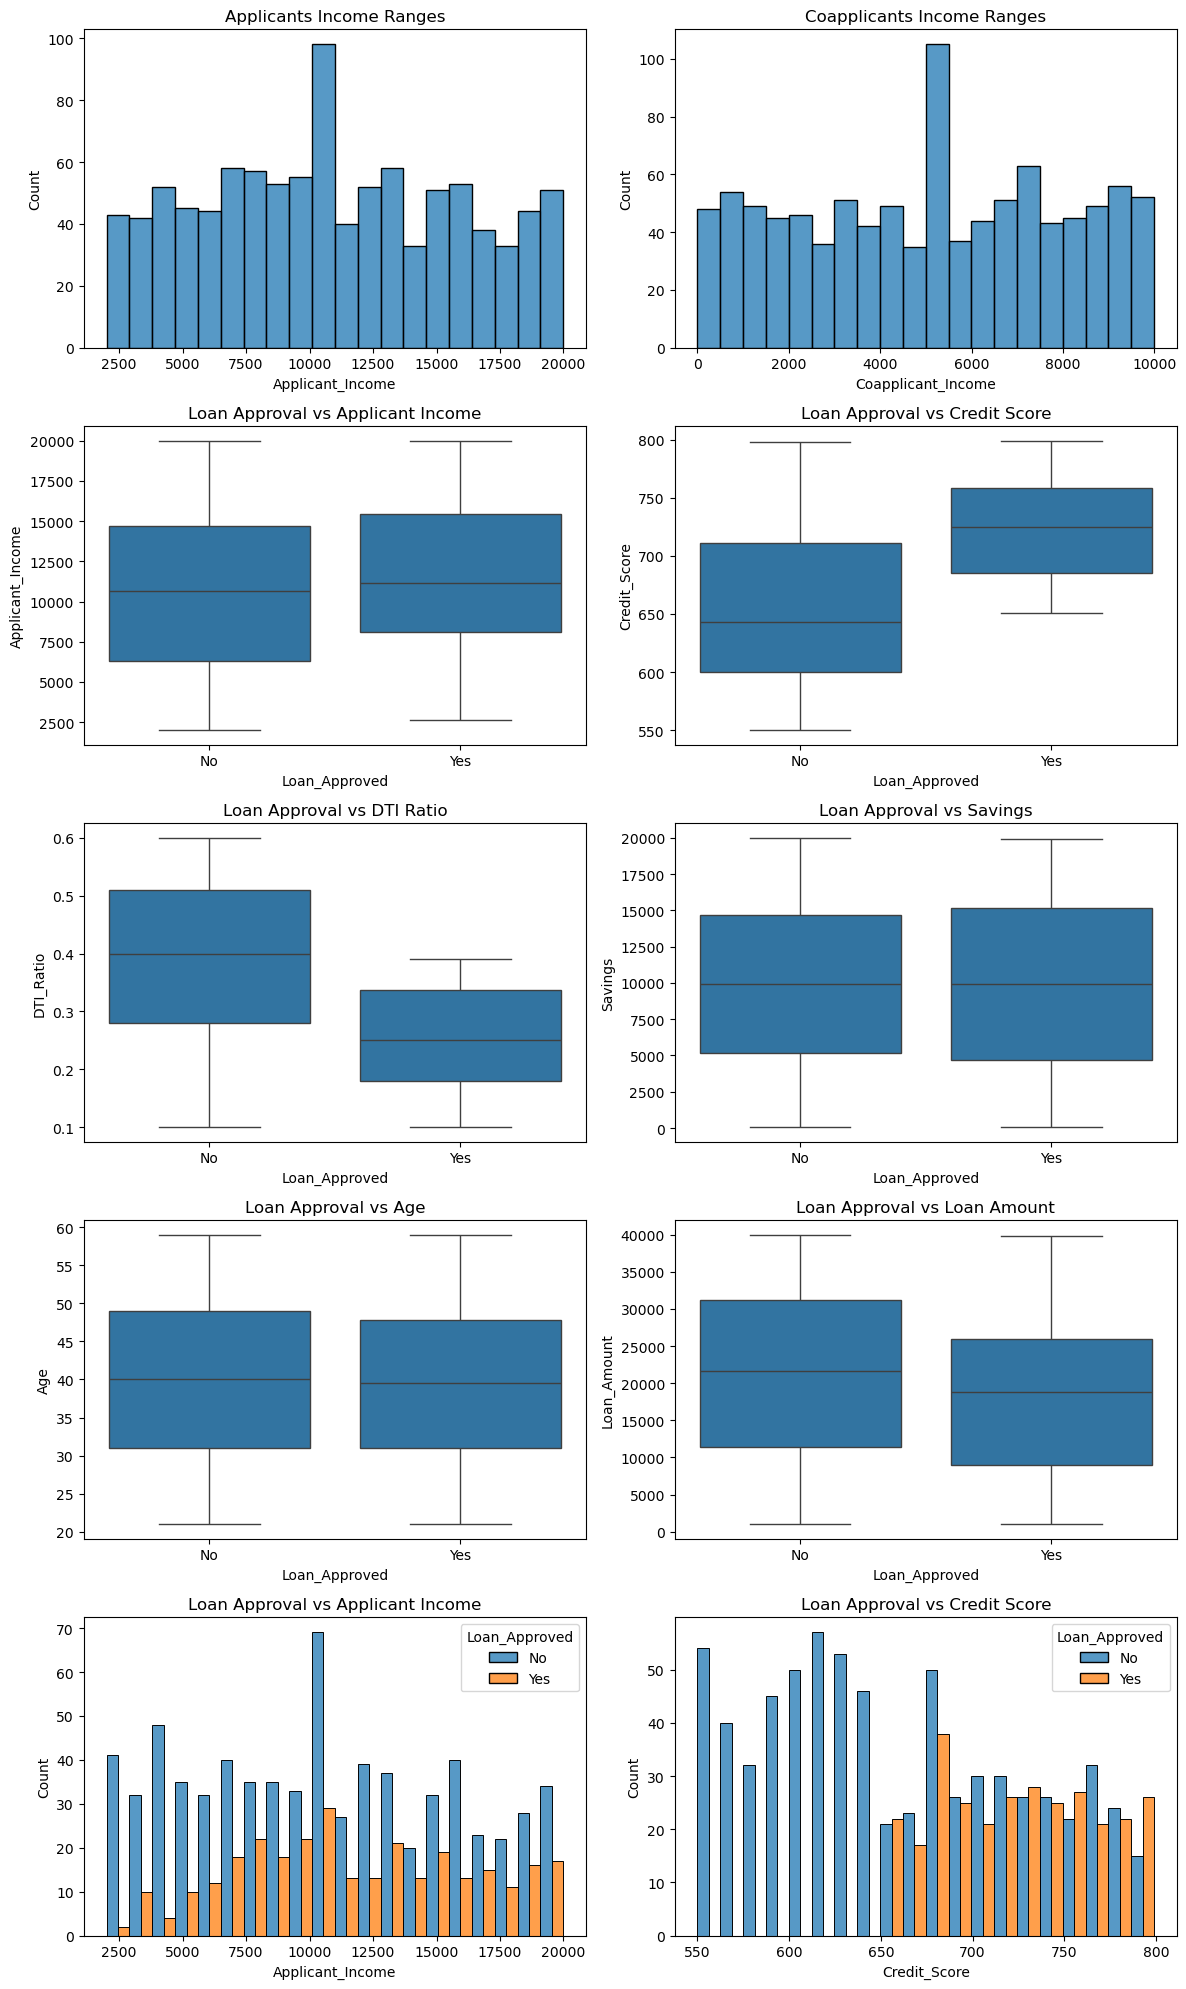

In [31]:
# Analyzing Income

fig, axes = plt.subplots(5, 2, figsize=(12, 20))

sns.histplot(
    data=df,
    x="Applicant_Income",
    bins=20,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Applicants Income Ranges")

sns.histplot(
    data=df,
    x="Coapplicant_Income",
    bins=20,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Coapplicants Income Ranges")

sns.histplot(
    data=df,
    x="Applicant_Income",
    hue="Loan_Approved",
    bins = 20,
    multiple="dodge",
    ax=axes[4, 0]
)
axes[4, 0].set_title("Loan Approval vs Applicant Income")


sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins = 20,
    multiple="dodge",
    ax=axes[4, 1]
)
axes[4, 1].set_title("Loan Approval vs Credit Score")


# Outliers Detection : Box Plot
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Loan Approval vs Applicant Income")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Credit_Score",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Loan Approval vs Credit Score")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="DTI_Ratio",
    ax=axes[2, 0]
)
axes[2, 0].set_title("Loan Approval vs DTI Ratio")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Savings",
    ax=axes[2, 1]
)
axes[2, 1].set_title("Loan Approval vs Savings")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Age",
    ax=axes[3, 0]
)
axes[3, 0].set_title("Loan Approval vs Age")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Loan_Amount",
    ax=axes[3, 1]
)
axes[3, 1].set_title("Loan Approval vs Loan Amount")




plt.tight_layout()
plt.show()

In [32]:
# Removing Applicant_Id Column: Cause it is given by bank for
# unique identification of users 
# It is not relevent for model training

# df = df.drop(columns=["Applicant_ID"])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

# Feature Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# LabelEncoder: For Ordinal data (Categories in columns have their label/Order)
le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])


# OneHotEncoder: For Nominal data (Not any label all categories of columns are equal)
cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

# Correlation Heatmap 

<Axes: >

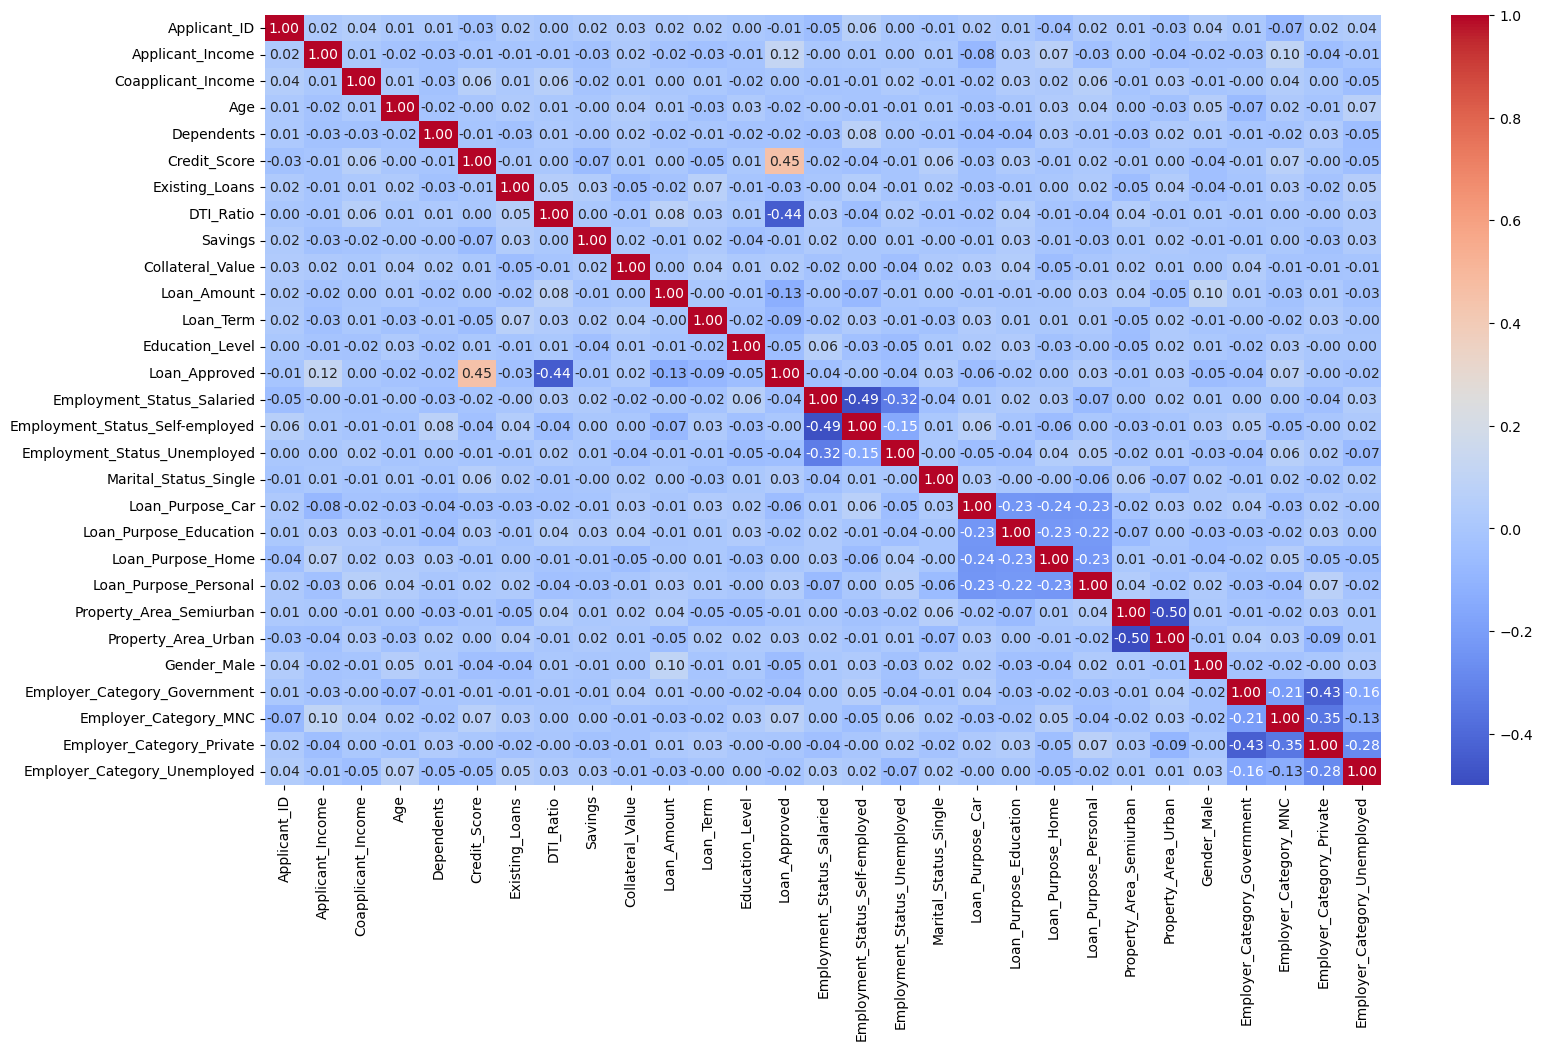

In [34]:
# Selecting all numeric columns
num_cols = df.select_dtypes(include="number")

# matrix of relation between all numeric columns
corr_matrix = num_cols.corr()

# Correlation Heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

# Train-Test-Split

In [46]:
X = df.drop(columns=["Loan_Approved"])
y = df["Loan_Approved"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify column types
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns

#
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)


# Feature Scaling 

In [47]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_ID                     1000 non-null   float64
 1   Applicant_Income                 1000 non-null   float64
 2   Coapplicant_Income               1000 non-null   float64
 3   Age                              1000 non-null   float64
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level      

# Model Training

- Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7868852459016393
Recall:  0.7868852459016393
F1 score:  0.7868852459016393
Accuracy:  0.87
CM:  [[126  13]
 [ 13  48]]


- KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.6428571428571429
Recall:  0.4426229508196721
F1 score:  0.5242718446601942
Accuracy:  0.755
CM:  [[124  15]
 [ 34  27]]


- Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

nb_model = KNeighborsClassifier()

nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.5957446808510638
Recall:  0.45901639344262296
F1 score:  0.5185185185185185
Accuracy:  0.74
CM:  [[120  19]
 [ 33  28]]


# Feature Engineering (Experiments to Improve model performance)

In [62]:
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

# Compressing Extreme(Skewed) Data to make them non-skewed
df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = df["Loan_Approved"]

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Feature Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Logistic Regression

In [63]:
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7846153846153846
Recall:  0.8360655737704918
F1 score:  0.8095238095238095
Accuracy:  0.88
CM:  [[125  14]
 [ 10  51]]


- KNN

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.7045454545454546
Recall:  0.5081967213114754
F1 score:  0.5904761904761905
Accuracy:  0.785
CM:  [[126  13]
 [ 30  31]]


- Naive Bayes

In [66]:
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.6666666666666666
Recall:  0.45901639344262296
F1 score:  0.5436893203883495
Accuracy:  0.765
CM:  [[125  14]
 [ 33  28]]


In [67]:
print("LOGISTIC REGRESSION is working well.")

LOGISTIC REGRESSION is working well.
